# Project steps

1.Import Library

2.Read file
    a.TRAIN and TEST
    b.Merge together append

3.Analyze data

4.Clean Data

5.Feature Engineering

6.Select X and y

7.Split Train and Test (using TRAIN)

8.Define ML Algo

9.Fit Ml Algo

10.Predict

11.Calculate Error

12.Predict(on TEST)

13.Save CSV with no index, just passenger ID and survived columns

# Libraries

In [471]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline

# Read Data

In [472]:
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [473]:
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Merge Data

In [474]:
df = train_df.append(test_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


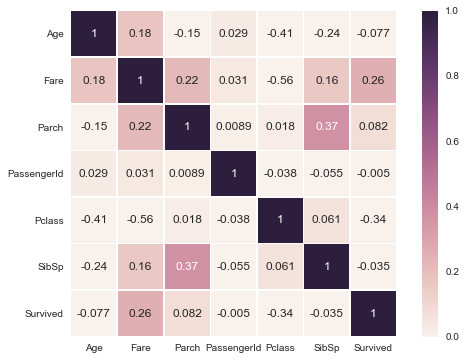

In [475]:
corr = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot = True,linewidths=.5, ax=ax,square=True,vmin=0, vmax=1, annot_kws = { 'fontsize' : 12 })

# Clean Data

### Ticket

In [476]:
def ticket_letter(data):
    data = data.replace('.','')
    data = data.replace('/','')
    l = data.split()
    l = map( lambda t : t.strip() , l )
    l = list(filter( lambda t : not t.isdigit() ,l ))
    if len(l) > 0:
        return l[0]
    else: 
        return 'all_digit'

df['ticket_letter'] = df['Ticket'].apply(ticket_letter)

In [477]:
tkt_total = pd.crosstab(df['ticket_letter'],df['Survived'],margins = True)
tkt_total

Survived,0.0,1.0,All
ticket_letter,,,
A4,7,0,7
A5,19,2,21
AS,1,0,1
C,3,2,5
CA,27,14,41
CASOTON,1,0,1
FC,1,0,1
FCC,1,4,5
Fa,1,0,1


### Cabin

In [478]:
# Fill NaN Cabin with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')
df[ 'Cabin_deck' ] = df[ 'Cabin' ].map( lambda c : c[0] )
df['Cabin_deck'].value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_deck, dtype: int64

### Title

In [479]:
df['title'] = df['Name'].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

# map each title
df['title'] = df.title.map(Title_Dictionary)

### Drop original 'Name','Ticket','Cabin' Columns

In [480]:
df = df.drop(['Name','Ticket','Cabin'],axis = 1)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age              1046 non-null float64
Embarked         1307 non-null object
Fare             1308 non-null float64
Parch            1309 non-null int64
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Survived         891 non-null float64
ticket_letter    1309 non-null object
Cabin_deck       1309 non-null object
title            1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,ticket_letter,Cabin_deck,title
0,22.0,S,7.2500,0,1,3,male,1,0.0,A5,U,Mr
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC,C,Mrs
2,26.0,S,7.9250,0,3,3,female,0,1.0,STONO2,U,Miss
3,35.0,S,53.1000,0,4,1,female,1,1.0,all_digit,C,Mrs
4,35.0,S,8.0500,0,5,3,male,0,0.0,all_digit,U,Mr
5,NaN,Q,8.4583,0,6,3,male,0,0.0,all_digit,U,Mr
6,54.0,S,51.8625,0,7,1,male,0,0.0,all_digit,E,Mr
7,2.0,S,21.0750,1,8,3,male,3,0.0,all_digit,U,Master
8,27.0,S,11.1333,2,9,3,female,0,1.0,all_digit,U,Mrs
9,14.0,C,30.0708,0,10,2,female,1,1.0,all_digit,U,Mrs


### Fill missing values

### Age

In [481]:
missing_age = df[df['Age'].isnull()]
missing_age = missing_age.drop('Age',1)

print(missing_age['Pclass'].value_counts())
print(missing_age['Survived'].value_counts())
print(missing_age['Parch'].value_counts())
print(missing_age['SibSp'].value_counts())
print(missing_age['Sex'].value_counts())
print(missing_age['Fare'].describe())

3    208
1     39
2     16
Name: Pclass, dtype: int64
0.0    125
1.0     52
Name: Survived, dtype: int64
0    234
2     16
1     10
9      2
4      1
Name: Parch, dtype: int64
0    206
1     39
8      8
2      6
3      4
Name: SibSp, dtype: int64
male      185
female     78
Name: Sex, dtype: int64
count    263.000000
mean      19.823319
std       27.550667
min        0.000000
25%        7.750000
50%        8.050000
75%       22.804150
max      227.525000
Name: Fare, dtype: float64


In [482]:
age_not_missing = df[df['Age'].notnull()]
age_not_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 415
Data columns (total 12 columns):
Age              1046 non-null float64
Embarked         1044 non-null object
Fare             1045 non-null float64
Parch            1046 non-null int64
PassengerId      1046 non-null int64
Pclass           1046 non-null int64
Sex              1046 non-null object
SibSp            1046 non-null int64
Survived         714 non-null float64
ticket_letter    1046 non-null object
Cabin_deck       1046 non-null object
title            1046 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 106.2+ KB


C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age              1309 non-null int32
Embarked         1307 non-null object
Fare             1308 non-null float64
Parch            1309 non-null int64
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Survived         891 non-null float64
ticket_letter    1309 non-null object
Cabin_deck       1309 non-null object
title            1309 non-null object
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 127.8+ KB


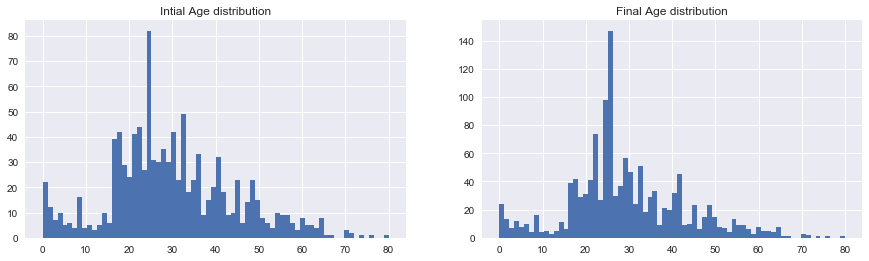

In [483]:
df[df['Age'].notnull()]['Age'] = df[df['Age'].notnull()]['Age'].astype(int)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Intial Age distribution')
axis2.set_title('Final Age distribution')


# plot original Age values
# NOTE: drop all null values, and convert to int
df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)



df['Age'] = df.groupby(['title','Sex','Parch','SibSp','Pclass']).transform(lambda x: x.fillna(x.median()))
df['Age'].fillna(df.Age.mean(),inplace = True)
df['Age'] = df['Age'].astype(int)
df.info()

# plot new Age Values
df['Age'].hist(bins=70, ax=axis2)


### Embarked & Fare

In [484]:
print(df.Embarked.value_counts())
print(df[df['Embarked'].isnull()])


S    914
C    270
Q    123
Name: Embarked, dtype: int64
     Age Embarked  Fare  Parch  PassengerId  Pclass     Sex  SibSp  Survived  \
61    38      NaN  80.0      0           62       1  female      0       1.0   
829   62      NaN  80.0      0          830       1  female      0       1.0   

    ticket_letter Cabin_deck title  
61      all_digit          B  Miss  
829     all_digit          B   Mrs  


In [485]:
df['Fare'].fillna(df.Fare.mean(),inplace = True)
df['Embarked'].fillna('S',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age              1309 non-null int32
Embarked         1309 non-null object
Fare             1309 non-null float64
Parch            1309 non-null int64
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Survived         891 non-null float64
ticket_letter    1309 non-null object
Cabin_deck       1309 non-null object
title            1309 non-null object
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 127.8+ KB


In [486]:
df.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.194749,-0.138163,0.024739,-0.445581,-0.209174,-0.056542
Fare,0.194749,1.000000,0.221522,0.031416,-0.558477,0.160224,0.257307
Parch,-0.138163,0.221522,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.024739,0.031416,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.445581,-0.558477,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.209174,0.160224,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.056542,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


# Feature Engineering

## Age, Sex and Class

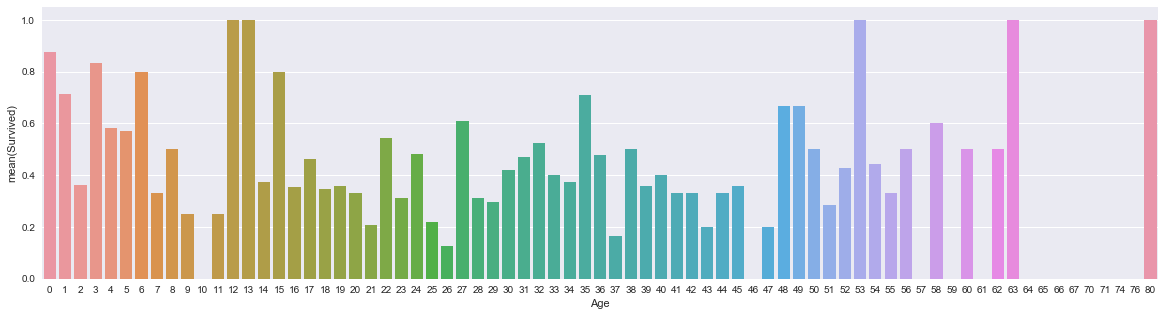

In [487]:
# Survival Rate for Age
fig,ax1 = plt.subplots(1,1,figsize=(20,5))
average_age = df[['Age','Survived']].groupby('Age',as_index=False).mean()
sns.barplot(y= 'Survived',x= 'Age',data = average_age)

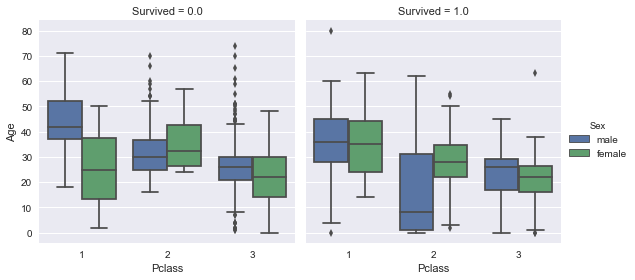

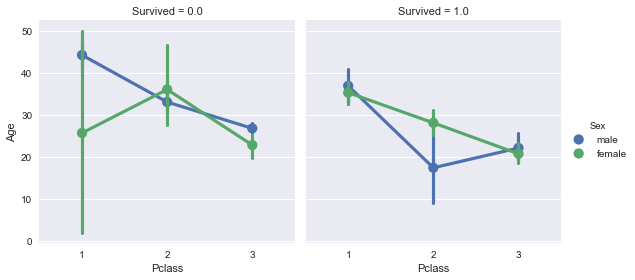

In [488]:
# Age across different Classes
sns.factorplot(x = 'Pclass',y = 'Age', col = 'Survived', hue = 'Sex', data=df,kind = 'box',size=4,aspect=1)
sns.factorplot(x = 'Pclass',y = 'Age', col = 'Survived', hue = 'Sex', data=df,kind = 'point',size=4,aspect=1)

C:\Users\Arjun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


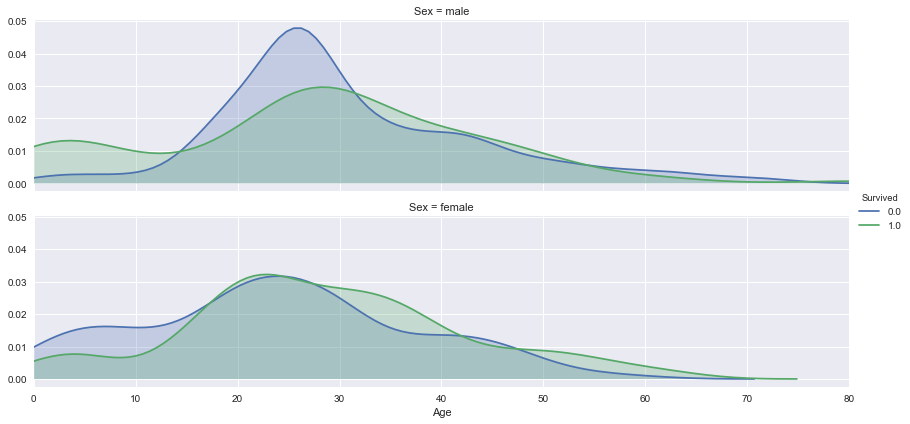

In [489]:
#Age distribution across Sex
facet = sns.FacetGrid( df , hue='Survived' , aspect=4 , row = 'Sex' )
facet.map( sns.kdeplot , 'Age' , shade= True )
facet.set( xlim=( 0 , df['Age'].max()) )
facet.add_legend()

In [490]:
#Create Age_group column
def Age_groups(data):
    if data < 14:
        return 'kid'
    elif data < 30:
        return 'teen'
    elif data < 60:
        return 'adult'
    else:
        return 'old'
df['Age_grp'] = df['Age'].apply(Age_groups)
print(pd.crosstab(df['Age_grp'],df['Survived']).apply(lambda x:x/x.sum(),axis = 1))
pd.crosstab(df['Age_grp'],df['Survived'],margins=True)

Survived       0.0       1.0
Age_grp                     
adult     0.571848  0.428152
kid       0.437500  0.562500
old       0.730769  0.269231
teen      0.675676  0.324324


Survived,0.0,1.0,All
Age_grp,,,
adult,195,146,341
kid,35,45,80
old,19,7,26
teen,300,144,444
All,549,342,891


In [491]:
#Create Class_group column
class_dic = {1:'high_class',2:'avg_class',3:'low_class'}
df['Class_grp'] = df['Pclass'].map(class_dic)

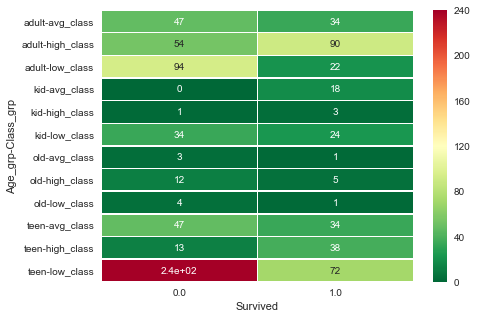

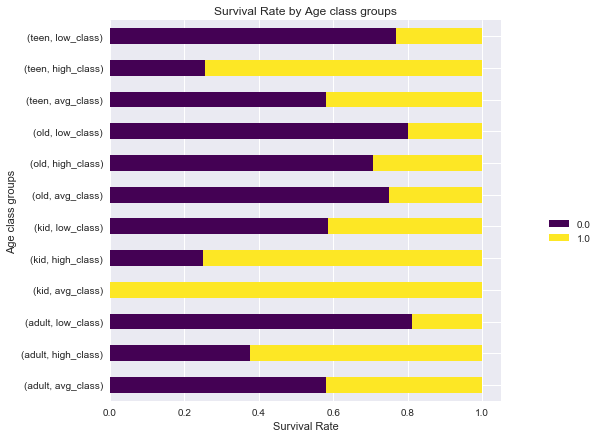

In [492]:
age_class_total = pd.crosstab([df['Age_grp'],df['Class_grp']],df['Survived'])
fig = plt.figure(figsize = (7,5))
ax1= fig.add_subplot(111)
sns.heatmap(age_class_total,cmap='RdYlGn_r', linewidths=0.5, annot=True,ax=ax1)


# Normalize the cross tab to sum to 1 & Plot:
age_class_ntotal = age_class_total.div(age_class_total.sum(1).astype(float), axis=0)
fig = plt.figure(figsize = (7,7))
ax1= fig.add_subplot(111)
plot1 = age_class_ntotal.plot(kind='barh',stacked=True,title='Survival Rate by Age class groups',ax=ax1,colormap = 'viridis')
plt.xlabel('Survival Rate')
plt.ylabel('Age class groups')
plt.legend(bbox_to_anchor=(1.1, 0.5), loc='upper left', ncol=1)

plt.show()

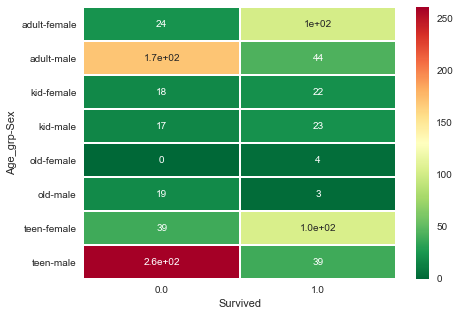

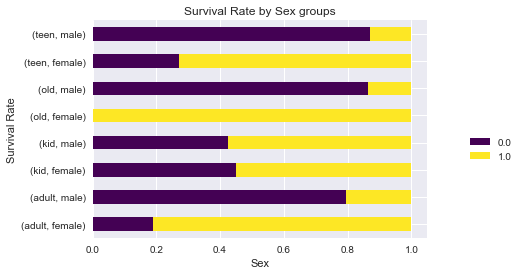

In [493]:
age_sex_total = pd.crosstab([df['Age_grp'],df['Sex']],df['Survived'])
fig = plt.figure(figsize = (7,5))
ax1= fig.add_subplot(111)
sns.heatmap(age_sex_total,cmap='RdYlGn_r', linewidths=0.5, annot=True,ax=ax1)

#Normalize the cross tab to sum to 1 & Plot
age_sex_ntotal = age_sex_total.div(age_sex_total.sum(1).astype(float), axis=0)
plot2 = age_sex_ntotal.plot(kind='barh',stacked=True,title='Survival Rate by Sex groups',colormap = 'viridis')
plt.legend(bbox_to_anchor=(1.1, 0.5), loc='upper left', ncol=1)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

### Title

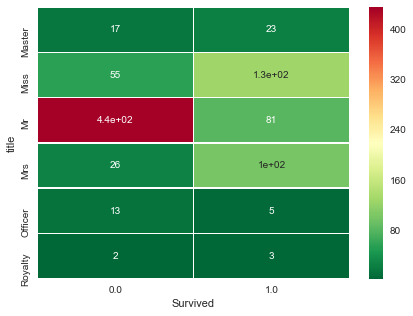

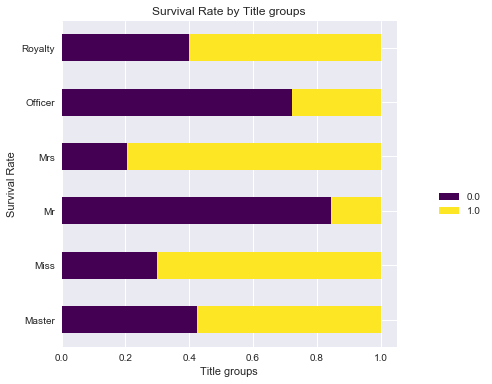

In [494]:
title_total = pd.crosstab(df['title'],df['Survived'])
fig = plt.figure(figsize = (7,5))
ax1= fig.add_subplot(111)
sns.heatmap(title_total,cmap='RdYlGn_r', linewidths=0.5, annot=True,ax=ax1)


# Normalize the cross tab to sum to 1 & Plot:
title_ntotal = title_total.div(title_total.sum(1).astype(float), axis=0)
fig = plt.figure(figsize = (6,6))
ax1= fig.add_subplot(111)
plot1 = title_ntotal.plot(kind='barh',stacked=True,title='Survival Rate by Title groups',ax=ax1,colormap = 'viridis')
plt.xlabel('Title groups')
plt.ylabel('Survival Rate')
plt.legend(bbox_to_anchor=(1.1, 0.5), loc='upper left', ncol=1)

plt.show()

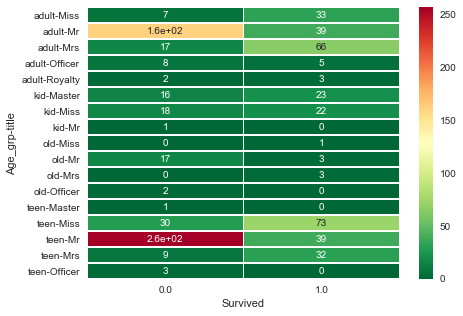

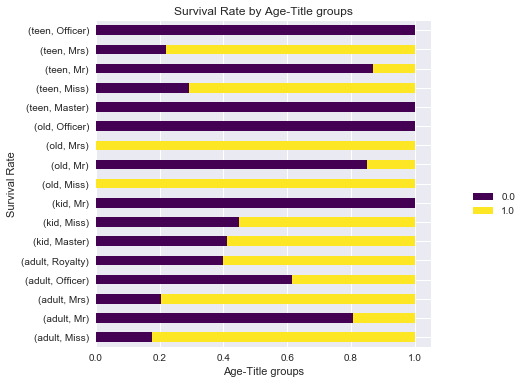

In [495]:
age_title_total = pd.crosstab([df['Age_grp'],df['title']],df['Survived'])
fig = plt.figure(figsize = (7,5))
ax1= fig.add_subplot(111)
sns.heatmap(age_title_total,cmap='RdYlGn_r', linewidths=0.5, annot=True,ax=ax1)

# Normalize the cross tab to sum to 1 & Plot:
age_title_ntotal = age_title_total.div(age_title_total.sum(1).astype(float), axis=0)
fig = plt.figure(figsize = (6,6))
ax1= fig.add_subplot(111)
plot1 = age_title_ntotal.plot(kind='barh',stacked=True,title='Survival Rate by Age-Title groups',ax=ax1,colormap = 'viridis')
plt.xlabel('Age-Title groups')
plt.ylabel('Survival Rate')
plt.legend(bbox_to_anchor=(1.1, 0.5), loc='upper left', ncol=1)

plt.show()

## Fare 

C:\Users\Arjun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


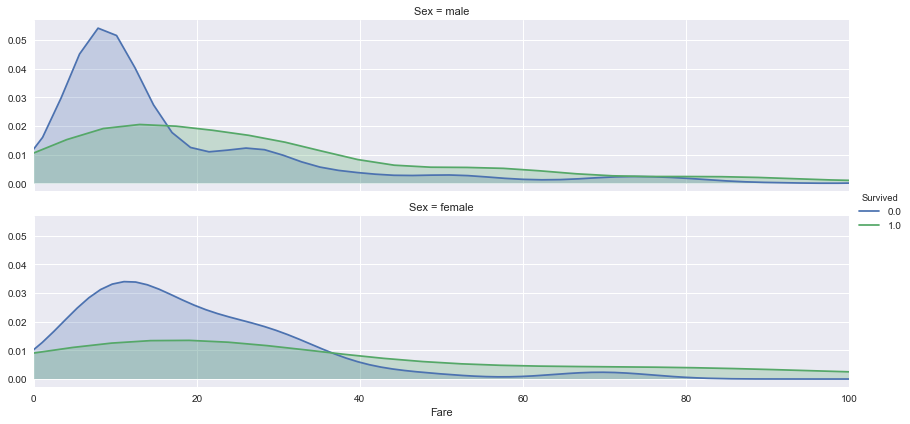

In [496]:
#Fare Distribution across Sex
facet = sns.FacetGrid( df , hue='Survived' , aspect=4 , row = 'Sex' )
facet.map( sns.kdeplot , 'Fare' , shade= True )
facet.set( xlim=( 0 ,100 ) )
facet.add_legend()

In [497]:
#Create Fare_grp_column
def Fare_groups(data):
    if data < 20:
        return 'low'
    elif data < 100:
        return 'high'
    else:
        return 'premium'
df['Fare_grp'] = df['Fare'].apply(Fare_groups)
df.groupby('Fare_grp')['Survived'].mean()

Fare_grp
high       0.495356
low        0.277670
premium    0.735849
Name: Survived, dtype: float64

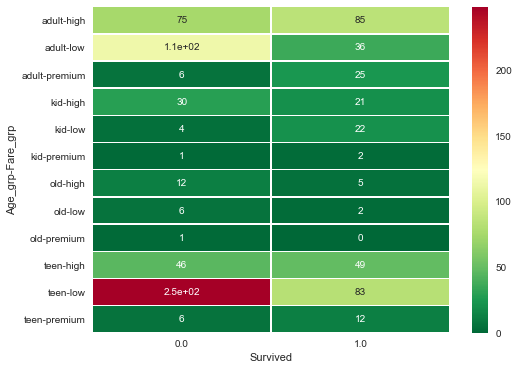

In [498]:
x = pd.crosstab([df['Age_grp'],df['Fare_grp']],df['Survived'])
fig = plt.figure(figsize = (8,6))
ax1= fig.add_subplot(111)
sns.heatmap(x,cmap='RdYlGn_r', linewidths=0.5, annot=True,ax=ax1)

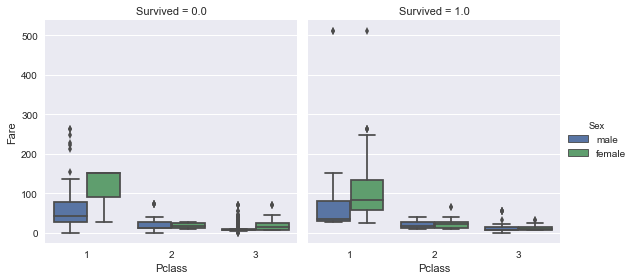

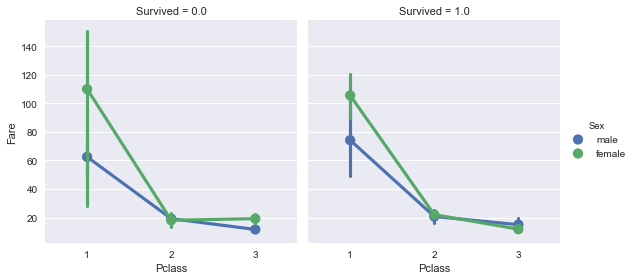

In [499]:
df['Fare'] = df['Fare'].astype(int)
sns.factorplot(x = 'Pclass',y = 'Fare', col = 'Survived', hue = 'Sex', data=df,kind = 'box',size=4,aspect=1)
sns.factorplot(x = 'Pclass',y = 'Fare', col = 'Survived', hue = 'Sex', data=df,kind = 'point',size=4,aspect=1)

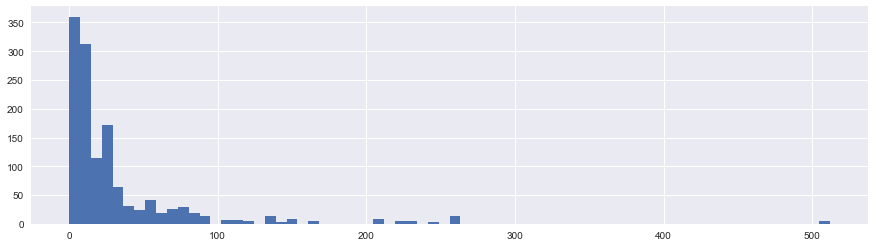

In [500]:
fig, axis1 = plt.subplots(1,1,figsize=(15,4))

df['Fare'].hist(bins=70,ax= axis1)

C:\Users\Arjun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


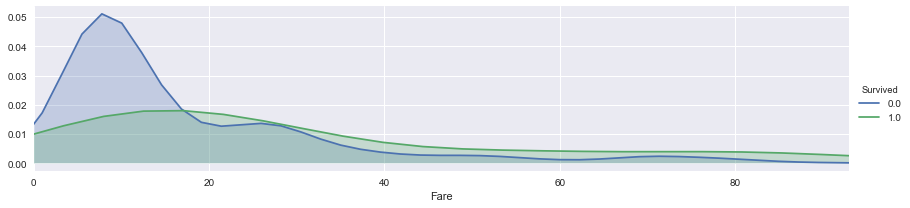

In [501]:
f = sns.FacetGrid(df, hue="Survived",aspect=4)
f.map(sns.kdeplot,'Fare',shade= True)
f.set(xlim=(0, df[df.Fare <100]['Fare'].max()))
f.add_legend()

## Family Size

In [502]:
df['Family'] = df['Parch'] + df['SibSp'] 

In [503]:
print(df.groupby('Family')['Survived'].mean())


Family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


In [504]:
def family_groups(data):
    if data == 0:
        return 'alone'
    elif data < 4:
        return 'medium_family'
    else:
        return 'large_family'
df['Family_grp'] = df['Family'].apply(family_groups)
df.groupby('Family_grp')['Survived'].mean()

Family_grp
alone            0.303538
large_family     0.161290
medium_family    0.578767
Name: Survived, dtype: float64

In [505]:
df = df.drop(['Parch','SibSp'],1)
df.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,ticket_letter,Cabin_deck,title,Age_grp,Class_grp,Fare_grp,Family,Family_grp
0,22,S,7,1,3,male,0.0,A5,U,Mr,teen,low_class,low,1,medium_family
1,38,C,71,2,1,female,1.0,PC,C,Mrs,adult,high_class,high,1,medium_family
2,26,S,7,3,3,female,1.0,STONO2,U,Miss,teen,low_class,low,0,alone
3,35,S,53,4,1,female,1.0,all_digit,C,Mrs,adult,high_class,high,1,medium_family
4,35,S,8,5,3,male,0.0,all_digit,U,Mr,adult,low_class,low,0,alone


## Embarked

In [506]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [507]:
embark_total = pd.crosstab(df['Embarked'],df['Survived'])
embark_total

Survived,0.0,1.0
Embarked,,
C,75,93
Q,47,30
S,427,219


In [508]:
age_dic = {'kid':1,'adult':2,'teen':3,'old':4}
df['Age_grp'] = df['Age_grp'].map(age_dic)
df['Age_class'] = df['Age_grp']*df['Pclass']


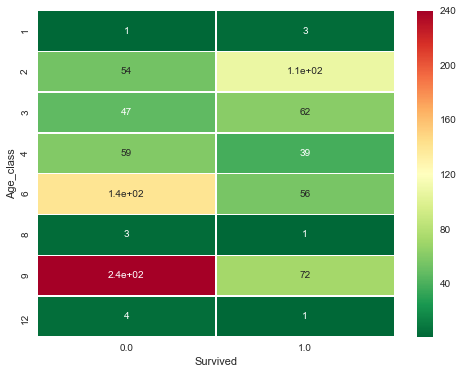

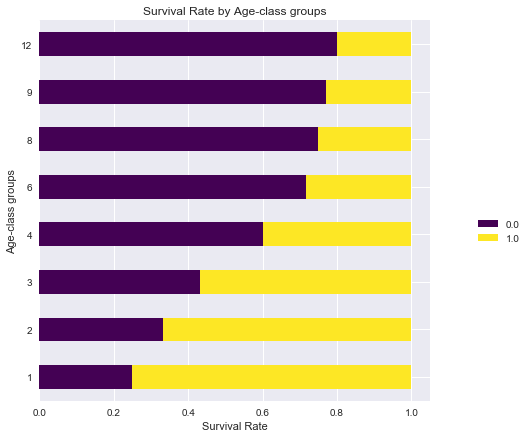

In [509]:
ageclass_total = pd.crosstab(df['Age_class'],df['Survived'])
fig = plt.figure(figsize = (8,6))
ax1= fig.add_subplot(111)
sns.heatmap(ageclass_total,cmap='RdYlGn_r', linewidths=0.5, annot=True,ax=ax1)


# Normalize the cross tab to sum to 1:
ageclass_ntotal = ageclass_total.div(ageclass_total.sum(1).astype(float), axis=0)
fig = plt.figure(figsize = (7,7))
ax1= fig.add_subplot(111)
plot1 = ageclass_ntotal.plot(kind='barh',stacked=True,title='Survival Rate by Age-class groups',ax=ax1,colormap = 'viridis')
plt.ylabel('Age-class groups')
plt.xlabel('Survival Rate')
plt.legend(bbox_to_anchor=(1.1, 0.5), loc='upper left', ncol=1)

plt.show()

In [510]:
df.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,ticket_letter,Cabin_deck,title,Age_grp,Class_grp,Fare_grp,Family,Family_grp,Age_class
0,22,S,7,1,3,male,0.0,A5,U,Mr,3,low_class,low,1,medium_family,9
1,38,C,71,2,1,female,1.0,PC,C,Mrs,2,high_class,high,1,medium_family,2
2,26,S,7,3,3,female,1.0,STONO2,U,Miss,3,low_class,low,0,alone,9
3,35,S,53,4,1,female,1.0,all_digit,C,Mrs,2,high_class,high,1,medium_family,2
4,35,S,8,5,3,male,0.0,all_digit,U,Mr,2,low_class,low,0,alone,6


## Convert all variables to dummies

In [511]:
#Converting Embarked to dummies
df_dummy_grp = pd.get_dummies(df['Embarked'], drop_first= True)
df= pd.concat([df, df_dummy_grp], axis=1)
df = df.drop('Embarked',1)

#Converting Sex to dummies
df_dummy_grp = pd.get_dummies(df['Sex'], drop_first= True)
df= pd.concat([df, df_dummy_grp], axis=1)
df = df.drop('Sex',1)

#Converting Class_grp to dummies
df_dummy_grp = pd.get_dummies(df['Class_grp'], drop_first= True)
df= pd.concat([df, df_dummy_grp], axis=1)
df = df.drop('Class_grp',1)

#Converting ticket_letter to dummies
df_dummy_grp = pd.get_dummies(df['ticket_letter'], drop_first= True)
df= pd.concat([df, df_dummy_grp], axis=1)
df = df.drop('ticket_letter',1)

#Converting Cabin_deck to dummies
df_dummy_grp = pd.get_dummies(df['Cabin_deck'], drop_first= True)
df= pd.concat([df, df_dummy_grp], axis=1)
df = df.drop('Cabin_deck',1)

#Converting title to dummies
df_dummy_grp = pd.get_dummies(df['title'], drop_first= True)
df= pd.concat([df, df_dummy_grp], axis=1)
df = df.drop('title',1)


#Converting Age_grp to dummies
df_dummy_grp = pd.get_dummies(df['Age_grp'], drop_first= True)
df= pd.concat([df, df_dummy_grp], axis=1)
df = df.drop('Age_grp',1)


#Converting Fare_grp to dummies
df_dummy_grp = pd.get_dummies(df['Fare_grp'], drop_first= True)
df= pd.concat([df, df_dummy_grp], axis=1)
df = df.drop('Fare_grp',1)

#Converting Family_grp to dummies
df_dummy_grp = pd.get_dummies(df['Family_grp'], drop_first= True)
df= pd.concat([df, df_dummy_grp], axis=1)
df = df.drop('Family_grp',1)

df.head()

,Age,Fare,PassengerId,Pclass,Survived,Family,Age_class,Q,S,male,...,Mrs,Officer,Royalty,2,3,4,low,premium,large_family,medium_family
0,22,7,1,3,0.0,1,9,0,1,1,...,0,0,0,0,1,0,1,0,0,1
1,38,71,2,1,1.0,1,2,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,26,7,3,3,1.0,0,9,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,35,53,4,1,1.0,1,2,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,35,8,5,3,0.0,0,6,0,1,1,...,0,0,0,1,0,0,1,0,0,0


## Drop Columns not required

In [512]:
df = df.drop(['PassengerId','Pclass'],axis =1)


In [513]:
df.head()

,Age,Fare,Survived,Family,Age_class,Q,S,male,high_class,low_class,...,Mrs,Officer,Royalty,2,3,4,low,premium,large_family,medium_family
0,22,7,0.0,1,9,0,1,1,0,1,...,0,0,0,0,1,0,1,0,0,1
1,38,71,1.0,1,2,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2,26,7,1.0,0,9,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,35,53,1.0,1,2,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,35,8,0.0,0,6,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [514]:
y = df[['Survived']]

In [515]:
X = df.drop(['Survived'],1)

In [516]:
y_TRAIN = y.iloc[0:891]

In [517]:
y_TRAIN.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 1 columns):
Survived    891 non-null float64
dtypes: float64(1)
memory usage: 13.9 KB


In [518]:
X_TRAIN = X.iloc[0:891,:]
X_TEST =  X.iloc[891:,:]
X_TEST

,Age,Fare,Family,Age_class,Q,S,male,high_class,low_class,A4,...,Mrs,Officer,Royalty,2,3,4,low,premium,large_family,medium_family
0,34,7,0,6,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,47,7,1,6,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
2,62,9,0,8,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,27,8,0,9,0,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,22,12,2,9,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
5,14,9,0,9,0,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
6,30,7,0,6,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
7,26,29,2,6,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,18,7,0,9,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
9,21,24,2,9,0,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,1


In [519]:
X_TRAIN.head()

,Age,Fare,Family,Age_class,Q,S,male,high_class,low_class,A4,...,Mrs,Officer,Royalty,2,3,4,low,premium,large_family,medium_family
0,22,7,1,9,0,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
1,38,71,1,2,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,26,7,0,9,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,35,53,1,2,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,35,8,0,6,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [520]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_TRAIN,y_TRAIN, test_size = 0.8, random_state = 0)

In [521]:
#random = RandomForestClassifier(n_estimators=10)

#random = random.fit(X_train,y_train) 

#grad = GradientBoostingClassifier()
#grad = grad.fit(X_train,y_train)

#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X_train,y_train)

lr = LogisticRegression()
lr = lr.fit(X_train,y_train)

C:\Users\Arjun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [522]:
#y_pred_test = random.predict(X_test)
#y_pred_test = grad.predict(X_test)
#y_pred_test = clf.predict(X_test)
y_pred_test = lr.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)

In [523]:
accuracy_score(y_test,y_pred_test)

0.79663394109396912

In [524]:
f1_score(y_test,y_pred_test)

0.73873873873873874

In [525]:
lr2 = LogisticRegression()
lr2 = lr2.fit(X_TRAIN,y_TRAIN)


C:\Users\Arjun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [526]:
Y_PRED = (lr2.predict(X_TEST))

Y_PRED = pd.DataFrame(Y_PRED)
Y_PRED.columns = ['Survived']
Y_PRED['Survived'] = Y_PRED['Survived'].astype(int)

In [527]:
final = pd.concat([X_TEST,Y_PRED,test_df['PassengerId']],axis = 1)
final

,Age,Fare,Family,Age_class,Q,S,male,high_class,low_class,A4,...,Royalty,2,3,4,low,premium,large_family,medium_family,Survived,PassengerId
0,34,7,0,6,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,892
1,47,7,1,6,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,1,893
2,62,9,0,8,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,894
3,27,8,0,9,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,895
4,22,12,2,9,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,1,896
5,14,9,0,9,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,897
6,30,7,0,6,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,898
7,26,29,2,6,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,899
8,18,7,0,9,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,900
9,21,24,2,9,0,1,1,0,1,1,...,0,0,1,0,0,0,0,1,0,901


In [528]:
final = final[['PassengerId','Survived']]
final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [529]:
 final.to_csv("Result_Titanic.csv",index  = False)